# Normalised LMS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal              
import IPython

### Step_1: Create a sinusoid signal

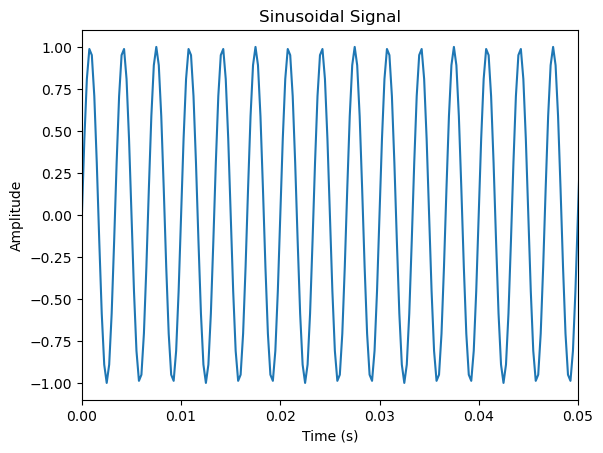

In [2]:
# a sinusoidal equation is: y(t) = Asin(2πft + φ)

sample_rate = 4000               
seconds = 5                        

time = [t/sample_rate for t in range(sample_rate * seconds)]

# The signal variables
Amplitude = 1                          
Frequency = 300   # Hz
phase_offset = 0                  

# Put all the above signal variables into our sinusoidal equation
sinusoid_signal = [(Amplitude*np.sin((Frequency*2*np.pi*(t))+ phase_offset)) for t in time]

plt.xlabel('Time (s)')  
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.xlim(0, 0.05)                          
plt.plot(time, sinusoid_signal) 
IPython.display.display(IPython.display.Audio(sinusoid_signal, rate=sample_rate))

### Step 2: Create a white noise based on “standard normal” distribution

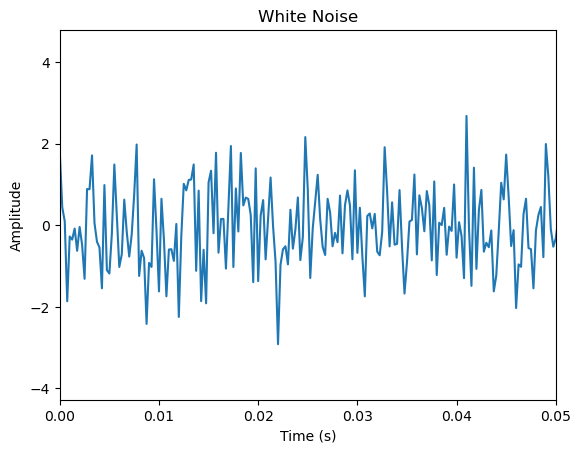

In [3]:
# np.random.seed() makes the random numbers and the same set of numbers will appear every time
np.random.seed(3)            

# The numpy.random.randn() function creates an array of specified shape. 
# And fills it with random values as per standard normal distribution.              
white_noise = np.random.randn(len(time)) 

plt.xlim(0, 0.05)
plt.title('White Noise')
plt.xlabel('Time (s)')  
plt.ylabel('Amplitude')
plt.plot(time, white_noise)
IPython.display.display(IPython.display.Audio(white_noise, rate=sample_rate))

### Step_3: Add white noise to the the sinusoid signal

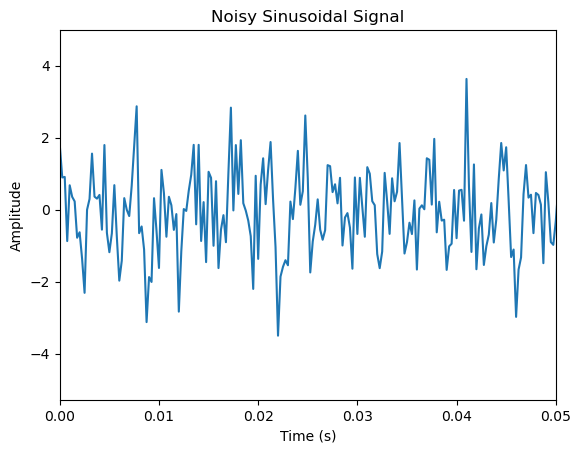

In [4]:
noisy_signal = sinusoid_signal + white_noise

plt.xlim(0, 0.05)
plt.title('Noisy Sinusoidal Signal')
plt.xlabel('Time (s)')  
plt.ylabel('Amplitude')
plt.plot(time, noisy_signal)
IPython.display.display(IPython.display.Audio(noisy_signal, rate=sample_rate))

### Step_4: Denoise the noisy signal with Normalized LMS algorithm

In [5]:
class FIR_filter:
    def __init__(self, coefficients):
        self.numberOftaps = len(coefficients)     # number of taps is equall with the number of coefficients
        self.coefficients = coefficients          # define the weights or coefficients         
        self.buffer = np.zeros(self.numberOftaps) # define input signal(u) as a list of zeros with the length number of taps(M=100)    
        
    def filter(self, x):
        self.buffer[1:] = self.buffer[:-1]
        self.buffer[0] = x 
        return_v = np.inner(self.buffer, self.coefficients)  # Inner product of buffer and cofficients   
        return return_v
    
    def update_coeffizients(self, error, mu):
        for i in range(self.numberOftaps):                   # the length of loop is the length number of taps
            self.coefficients[i] = self.coefficients[i-1] + error * mu * self.buffer[i] 
    
    def LMS_normalise(self, error, mu, delta = 0.5):         # define normalize of LMS algorithm
        for i in range(self.numberOftaps):                   # the length of loop is the length number of taps
            self.norm = np.linalg.norm(self.buffer[i])       # calculate the norm of input signal(u)
            self.u_norm_square = np.square(self.norm)        # square the norm of input signal for below coefficients[i] 
            self.coefficients[i] = self.coefficients[i] + error * (mu / (delta + self.u_norm_square)) * self.buffer[i] 

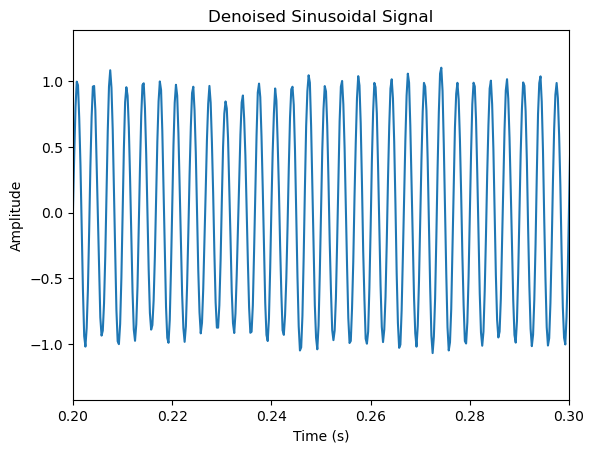

In [6]:
M = 100                                           # M is the number of taps

mu = 0.01                                         # learning curve                           
       
# first define the filter as a list of zeros with the length number of taps(M=100)
f = FIR_filter(np.zeros(M))        

y = np.empty(len(noisy_signal))                
c = np.empty(len(noisy_signal))               

for i in range(len(noisy_signal)):
    denoised_sig = f.filter(noisy_signal[i])
    c[i] = denoised_sig
    error = sinusoid_signal[i] - denoised_sig


    f.LMS_normalise(error, mu)
    
    y[i] = error

plt.title('Denoised Sinusoidal Signal')
plt.xlabel('Time (s)')  
plt.ylabel('Amplitude')
plt.xlim(0.2, .3)
plt.plot(time, c)
plt.show()
IPython.display.display(IPython.display.Audio(c, rate=sample_rate))